In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data Process

In [58]:
train = pd.read_csv("../desktop/train.csv")
test = pd.read_csv("../desktop/test.csv")

In [59]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [60]:
train.shape

(159571, 8)

There are 6 categories of comments:
Toxic

Severe Toxic

Obscene

Threat

Insult

Identity hate

In [61]:
# create clean comments
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']= (rowsums == 0)

In [63]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True


In [62]:
train['clean'].sum()

143346

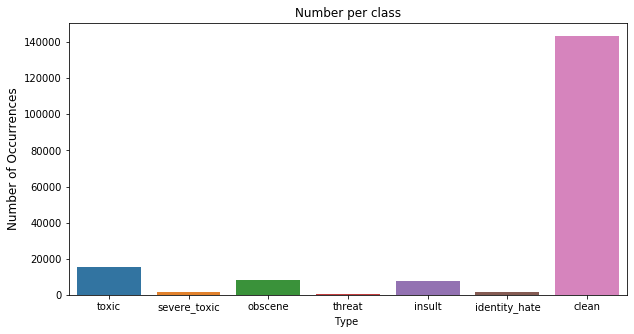

In [67]:
x=train.iloc[:,2:].sum()

#plot the categories of toxic comments
plt.figure(figsize=(10,5))
ax= sns.barplot(x.index, x.values)
plt.title("Number per class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ')

plt.show()

From this plot, we can see that most of the comments are clean which is a very unbalance dataset. This might have some issue.

# Sentiment Analysis

Use sentiment analysis for the classified comments.


In [68]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiachuancui/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
help(SentimentIntensityAnalyzer)

Help on class SentimentIntensityAnalyzer in module nltk.sentiment.vader:

class SentimentIntensityAnalyzer(builtins.object)
 |  SentimentIntensityAnalyzer(lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
 |  
 |  Give a sentiment intensity score to sentences.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  make_lex_dict(self)
 |      Convert lexicon file to a dictionary
 |  
 |  polarity_scores(self, text)
 |      Return a float for sentiment strength based on the input text.
 |      Positive values are positive valence, negative value are negative
 |      valence.
 |  
 |  score_valence(self, sentiments, text)
 |  
 |  sentiment_valence(self, valence, sentitext, item, i, sentiments)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |

In [69]:
sentiment = SentimentIntensityAnalyzer()

In [76]:
data = []

for index in train.index:
    data.append(sentiment.polarity_scores(train.iloc[index, 1]))

In [77]:
data_df = pd.concat([pd.DataFrame(data), train["clean"]], axis =1)

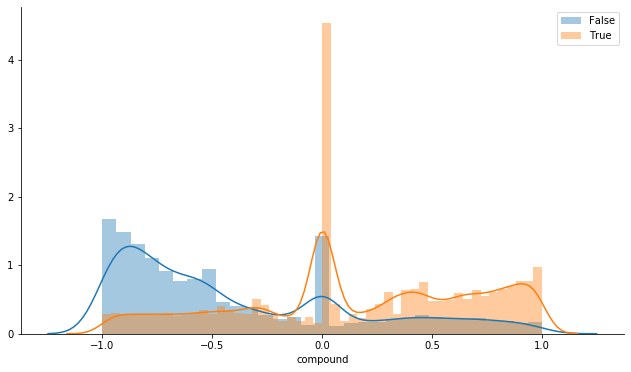

In [78]:
g = sns.FacetGrid(data_df, hue = "clean")
g.map(sns.distplot, "compound")
g.fig.set_size_inches(10, 6)

plt.legend()

From the plt, we can see
there are heavy weight on both negative and positive and there are some clean comments with high negative score.

Add two more variables:

the ratio between the negative and netural score

the ratio between the positive and neutral score.

In [88]:
analyze = pd.DataFrame(data)

analyze["neu/neg"] = analyze["neu"]/(analyze["neg"] + 0.0001)
analyze["neu/pos"] = analyze["neu"]/(analyze["pos"] + 0.0001)

eda = pd.concat([analyze, train["clean"]], axis =1)

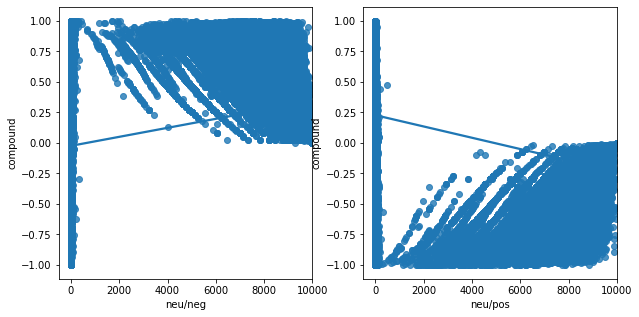

In [89]:
fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))

sns.regplot("neu/neg", "compound", data = eda, ax = ax1)
sns.regplot("neu/pos", "compound", data = eda, ax = ax2)

From the above two plot, we can see:
    
The high ratio for netural score and negative score, the sentiment is high

the high ratio for netural score and positive score, the sentiment is low

lower score means that the comment is  negative and high score means the comment is positive